## DM PROJECT - MCM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('A2Z_insurance.csv')
df.columns

Index(['Customer Identity', 'First Policy´s Year', 'Brithday Year',
       'Educational Degree', 'Gross Monthly Salary', 'Geographic Living Area',
       'Has Children (Y=1)', 'Customer Monetary Value', 'Claims Rate',
       'Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations'],
      dtype='object')

In [3]:
#Drop the columns Birthday year
df = df.drop('Brithday Year', axis = 1)
df.columns

Index(['Customer Identity', 'First Policy´s Year', 'Educational Degree',
       'Gross Monthly Salary', 'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Claims Rate', 'Premiums in LOB: Motor',
       'Premiums in LOB: Household', 'Premiums in LOB: Health',
       'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations'],
      dtype='object')

In [4]:
df.dtypes
#Everything ok with the types.

Customer Identity                        int64
First Policy´s Year                    float64
Educational Degree                      object
Gross Monthly Salary                   float64
Geographic Living Area                 float64
Has Children (Y=1)                     float64
Customer Monetary Value                float64
Claims Rate                            float64
Premiums in LOB: Motor                 float64
Premiums in LOB: Household             float64
Premiums in LOB: Health                float64
Premiums in LOB:  Life                 float64
Premiums in LOB: Work Compensations    float64
dtype: object

In [5]:
df.shape

(10296, 13)

In [6]:
df.describe()

,Customer Identity,First Policy´s Year,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,10296.00000,10266.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,5148.50000,1991.062634,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,2972.34352,511.267913,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1.00000,1974.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2574.75000,1980.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,5148.50000,1986.000000,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,7722.25000,1992.000000,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,10296.00000,53784.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [7]:
df.info()
#We have NaN values.
#How many?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 13 columns):
Customer Identity                      10296 non-null int64
First Policy´s Year                    10266 non-null float64
Educational Degree                     10279 non-null object
Gross Monthly Salary                   10260 non-null float64
Geographic Living Area                 10295 non-null float64
Has Children (Y=1)                     10275 non-null float64
Customer Monetary Value                10296 non-null float64
Claims Rate                            10296 non-null float64
Premiums in LOB: Motor                 10262 non-null float64
Premiums in LOB: Household             10296 non-null float64
Premiums in LOB: Health                10253 non-null float64
Premiums in LOB:  Life                 10192 non-null float64
Premiums in LOB: Work Compensations    10210 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.0+ MB


In [8]:
df.isnull().sum()
#It seems that we have a lot of NaN values in the Premiuns.
#Let's check exactly how many rows have NaN values.

Customer Identity                        0
First Policy´s Year                     30
Educational Degree                      17
Gross Monthly Salary                    36
Geographic Living Area                   1
Has Children (Y=1)                      21
Customer Monetary Value                  0
Claims Rate                              0
Premiums in LOB: Motor                  34
Premiums in LOB: Household               0
Premiums in LOB: Health                 43
Premiums in LOB:  Life                 104
Premiums in LOB: Work Compensations     86
dtype: int64

In [9]:
df_NaN = df[df.isna().any(axis=1)]
df_NaN.shape

#We have 295 rows with NaN values. Can we just drop them? Nop. This represents 2,86% of the data, we're going to loose too many information.

(295, 13)

## Replacing NaN

In [10]:
#We can immediatly replace the NaN values in the premimns by 0 because 
#we'll assume that if there is a NaN values it's because the client doesn't have that kind of insurance.

df['Premiums in LOB: Motor'] = df['Premiums in LOB: Motor'].fillna(0)
df['Premiums in LOB: Health'] = df['Premiums in LOB: Health'].fillna(0)
df['Premiums in LOB:  Life'] = df['Premiums in LOB:  Life'].fillna(0)
df['Premiums in LOB: Work Compensations'] = df['Premiums in LOB: Work Compensations'].fillna(0)
df['Premiums in LOB: Household'] = df['Premiums in LOB: Household'].fillna(0)

#Let's check again the NaN values.

In [11]:
df.isnull().sum().sum()
#The number of NaN values decresed a lot, still we're not going to drop those.
#We decided that we're going to replace them because we don't want to loose informatation.

105

In [12]:
#Let's see what we need to replace
print(df.isnull().sum())
print(df_NaN.shape) # 78 rows still have NaN values.

#First Year policy: we can use CMV to find the values needed.
#Educational Degree: we can replace them by looking into the mean salary of each Educational degree and replace them.
#Gross Monthly Salary: Same as Educational degree but the other way around (?)
#Geographic Living Area: replace by the mode, or look into the salary.
#Has Children: 

Customer Identity                       0
First Policy´s Year                    30
Educational Degree                     17
Gross Monthly Salary                   36
Geographic Living Area                  1
Has Children (Y=1)                     21
Customer Monetary Value                 0
Claims Rate                             0
Premiums in LOB: Motor                  0
Premiums in LOB: Household              0
Premiums in LOB: Health                 0
Premiums in LOB:  Life                  0
Premiums in LOB: Work Compensations     0
dtype: int64
(295, 13)


In [13]:
#Before we start to replace values. We want to check if there is some inconsistant data in this rows.~
#If there is it'll be immediately dropped.

df_NaN = df[df.isna().any(axis=1)]

df_NaN.describe()
#It doesn't seems to be inconsistent data. (for now)
#Let's then start replacing the NaN values!!!

,Customer Identity,First Policy´s Year,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,78.000000,48.000000,42.000000,77.000000,57.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,4924.833333,1983.833333,2631.785714,2.415584,0.701754,172.438077,0.688462,300.441154,131.107051,158.498462,34.731538,38.716795
std,2982.979058,6.950688,915.084550,1.128001,0.461555,216.421279,0.347055,149.536279,178.527594,76.894793,35.794989,40.384796
min,22.000000,1974.000000,924.000000,1.000000,0.000000,-291.160000,0.000000,0.000000,-50.000000,0.000000,-4.000000,-10.000000
25%,2505.500000,1978.000000,1953.250000,2.000000,0.000000,-25.000000,0.372500,178.005000,0.000000,97.880000,8.807500,11.000000
50%,4788.500000,1981.500000,2667.500000,2.000000,1.000000,113.860000,0.750000,303.780000,61.675000,158.640000,20.115000,25.560000
75%,7466.750000,1989.000000,3223.750000,4.000000,1.000000,385.690000,1.000000,425.190000,210.450000,220.040000,52.455000,59.012500
max,10011.000000,1998.000000,4465.000000,4.000000,1.000000,575.010000,1.620000,561.660000,926.850000,311.280000,163.920000,175.700000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb58801350>]],
      dtype=object)

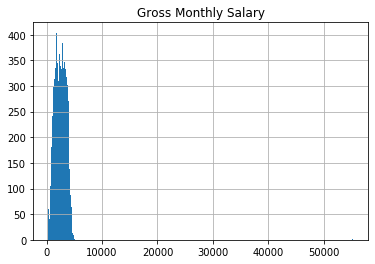

In [14]:
#Let's see what we have about the salary.

#Should we replace the Gross Monthly Salary with the mean or the median?
 
df.hist(column='Gross Monthly Salary', bins = 500)


In [15]:
df['Gross Monthly Salary'].nlargest(10) #These are outliers, we'll deal with this latter.

5882    55215.0
8261    34490.0
7510     5021.0
4244     4995.0
4440     4904.0
6902     4897.0
4772     4883.0
8284     4883.0
9433     4883.0
1406     4872.0
Name: Gross Monthly Salary, dtype: float64

In [16]:
#The histogram of the data appears to be symmetric, however, there are outliers that are very removed from the rest of the data and,
#for that reason, we have chosen to replace the null values in the 'Gross Monthly Salary' column with the median and not the mean.

median = df['Gross Monthly Salary'].median()
df['Gross Monthly Salary'] = df['Gross Monthly Salary'].fillna(median)

df['Gross Monthly Salary'].isnull().sum()
#Puff, no more NaN values in the Salary. #Nice shot Mafas, so proud of my sis ^^!!

0

In [17]:
#NEXT!!! Educational degree replacement based on Salary.
#We'll calculate the median salary of the grouped educational degree.

df_edu = df[['Educational Degree', 'Gross Monthly Salary']]

df_not_nan = df_edu[df_edu.notna().any(axis = 1)]

df_notNA_grouped = df_not_nan.groupby(['Educational Degree'])['Gross Monthly Salary'].median()
df_notNA_grouped

Educational Degree
1 - Basic          1714.00
2 - High School    2501.75
3 - BSc/MSc        2609.00
4 - PhD            2644.00
Name: Gross Monthly Salary, dtype: float64

In [18]:
df[df.isna().any(axis = 1)]

,Customer Identity,First Policy´s Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
296,297,NaN,4 - PhD,3591.0,NaN,NaN,-49.11,1.04,447.64,-25.00,130.58,0.89,12.89
619,620,1980.0,3 - BSc/MSc,1333.0,2.0,NaN,312.52,0.40,286.83,-6.10,175.70,52.90,56.79
755,756,NaN,4 - PhD,2913.0,3.0,0.0,430.20,0.28,465.20,59.45,94.13,4.89,10.00
772,773,1998.0,2 - High School,3601.0,2.0,NaN,27.01,0.94,104.91,308.95,285.61,64.90,52.90
896,897,NaN,NaN,2643.0,1.0,1.0,-25.00,1.00,515.54,33.90,47.01,12.89,3.78
1707,1708,1992.0,NaN,3827.0,4.0,0.0,355.52,0.33,222.71,146.70,0.00,94.13,105.24
2227,2228,NaN,3 - BSc/MSc,1987.0,2.0,NaN,429.87,0.25,376.85,33.90,154.25,39.34,4.78
2362,2363,1981.0,2 - High School,1607.0,2.0,NaN,271.51,0.64,292.61,308.40,159.14,11.89,59.68
2449,2450,NaN,NaN,4465.0,4.0,0.0,457.75,0.36,338.73,187.25,175.81,43.23,4.78
2671,2672,1992.0,2 - High School,1140.0,2.0,NaN,356.40,0.54,168.03,265.60,273.94,68.79,52.23


In [19]:
#Replacing the NaN values of Educational Degree column based on the median of gross salary of which level of education.

df.loc[896,'Educational Degree'] = '4 - PhD'

df.loc[1707,'Educational Degree'] = '4 - PhD'

df.loc[2449,'Educational Degree'] = '4 - PhD'

df.loc[2728,'Educational Degree'] = '4 - PhD'

df.loc[2770,'Educational Degree'] = '1 - Basic'

df.loc[3056,'Educational Degree'] = '1 - Basic'

df.loc[4423,'Educational Degree'] = '4 - PhD'

df.loc[6560,'Educational Degree'] = '2 - High School'

df.loc[6535,'Educational Degree'] = '4 - PhD'

df.loc[7321,'Educational Degree'] = '4 - PhD'

df.loc[7470,'Educational Degree'] = '4 - PhD'

df.loc[8081,'Educational Degree'] = '4 - PhD'

df.loc[8173,'Educational Degree'] = '4 - PhD'

df.loc[8303,'Educational Degree'] = '2 - High School'

df.loc[9136,'Educational Degree'] = '2 - High School'

df.loc[9136,'Educational Degree'] = '3 - BSc/MSc'

df.loc[9312,'Educational Degree'] = '1 - Basic'

df.loc[9610,'Educational Degree'] = '4 - PhD'

df['Educational Degree'].isnull().sum()

0

In [20]:
#Geograpgic Living Area
#We decided to replace this single NaN value by the mode.

mode = df['Geographic Living Area'].mode() #it's 4.0

df['Geographic Living Area'] = df['Geographic Living Area'].fillna(4.0)

df['Geographic Living Area'].isnull().sum()

0

In [21]:
df[df.isna().any(axis = 1)]

,Customer Identity,First Policy´s Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
296,297,NaN,4 - PhD,3591.0,4.0,NaN,-49.11,1.04,447.64,-25.00,130.58,0.89,12.89
619,620,1980.0,3 - BSc/MSc,1333.0,2.0,NaN,312.52,0.40,286.83,-6.10,175.70,52.90,56.79
755,756,NaN,4 - PhD,2913.0,3.0,0.0,430.20,0.28,465.20,59.45,94.13,4.89,10.00
772,773,1998.0,2 - High School,3601.0,2.0,NaN,27.01,0.94,104.91,308.95,285.61,64.90,52.90
896,897,NaN,4 - PhD,2643.0,1.0,1.0,-25.00,1.00,515.54,33.90,47.01,12.89,3.78
2227,2228,NaN,3 - BSc/MSc,1987.0,2.0,NaN,429.87,0.25,376.85,33.90,154.25,39.34,4.78
2362,2363,1981.0,2 - High School,1607.0,2.0,NaN,271.51,0.64,292.61,308.40,159.14,11.89,59.68
2449,2450,NaN,4 - PhD,4465.0,4.0,0.0,457.75,0.36,338.73,187.25,175.81,43.23,4.78
2671,2672,1992.0,2 - High School,1140.0,2.0,NaN,356.40,0.54,168.03,265.60,273.94,68.79,52.23
2703,2704,NaN,1 - Basic,2105.0,2.0,NaN,302.62,0.54,299.28,167.25,162.92,28.34,51.01


In [22]:
#Has Children
#I'm not seeing a pattern on this, so let's replace by the mode.

mode_children = df['Has Children (Y=1)'].mode() #it's 1.0

df['Has Children (Y=1)'] = df['Has Children (Y=1)'].fillna(1.0)

df['Has Children (Y=1)'].isnull().sum()

0

In [23]:
#First year Policy
#We need to add some variables first.

df['Premiums Sum'] = df['Premiums in LOB: Motor'] +  df['Premiums in LOB: Household'] + df['Premiums in LOB: Health'] + df['Premiums in LOB:  Life'] + df['Premiums in LOB: Work Compensations']

df['Age As Client'] = 2016 - df['First Policy´s Year']

df['Anual Salary'] = df['Gross Monthly Salary'] * 12

In [24]:
#We know that CMV = CostumerAnnualProfit*NumberYearsThatIsCostumer
#Wich implies that NumberYearsThatIsCostumer = CMV / CostumerAnnualProfit - AcquisitionCost
#Let's assume that a employee has 20% of taxes at the end of the month.


df['Net Monthly Salary'] = df['Gross Monthly Salary']*0.80

df['Costumer Annual Profit'] = df['Net Monthly Salary']*12

df['Acquisition Cost'] = df['Age As Client'] - (df['Customer Monetary Value']/ df['Costumer Annual Profit'])

df['First Year Dummy'] = 2016 - ((df['Customer Monetary Value']/ df['Costumer Annual Profit']) - (-df['Acquisition Cost']))

#We can now calculate the Acquisition Cost mean:

acquisition_mean =  df['Acquisition Cost'].mean()

df['Acquisition Cost'] = df['Acquisition Cost'].fillna(29.971561005019108)


#Now we can replace the NaN values in the First Policy columns using this value.

df['First Policy´s Year'] = df['First Policy´s Year'].fillna(2016 - ((df['Customer Monetary Value']/ df['Costumer Annual Profit']) - (-df['Acquisition Cost'])))

df['Age As Client'] = df['Age As Client'].fillna(2016 - df['First Policy´s Year'])

df = df.drop(['First Year Dummy'], axis = 1)

df.isnull().sum()

#We finally don't have NaN values.

Customer Identity                      0
First Policy´s Year                    0
Educational Degree                     0
Gross Monthly Salary                   0
Geographic Living Area                 0
Has Children (Y=1)                     0
Customer Monetary Value                0
Claims Rate                            0
Premiums in LOB: Motor                 0
Premiums in LOB: Household             0
Premiums in LOB: Health                0
Premiums in LOB:  Life                 0
Premiums in LOB: Work Compensations    0
Premiums Sum                           0
Age As Client                          0
Anual Salary                           0
Net Monthly Salary                     0
Costumer Annual Profit                 0
Acquisition Cost                       0
dtype: int64

## Outlier Detection

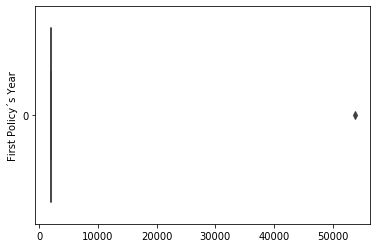

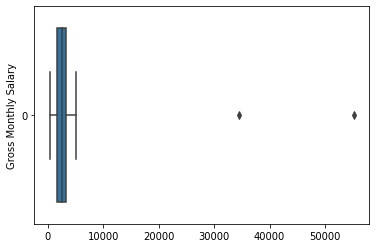

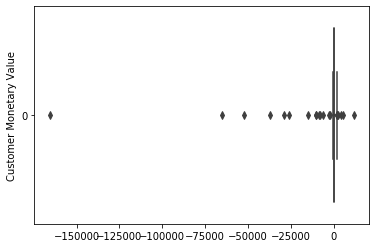

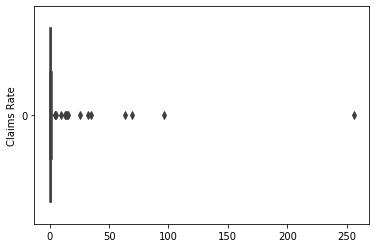

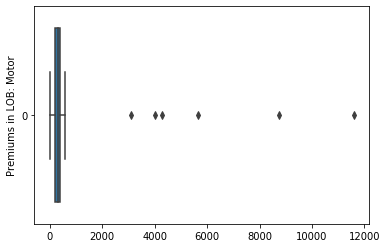

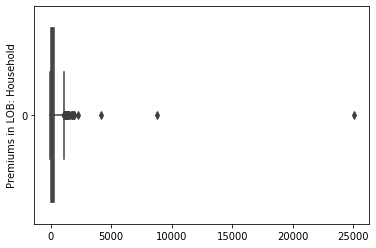

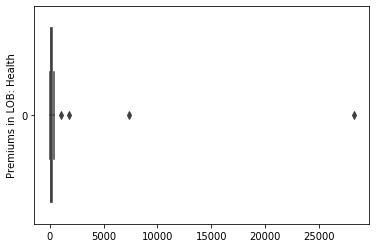

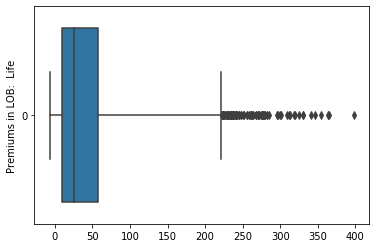

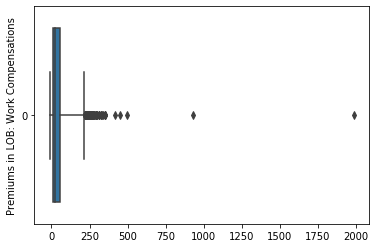

In [25]:
#We're going to spot the outliers with boxplots and them remove them with the Z-score.

col = ['First Policy´s Year', 'Gross Monthly Salary',
       'Customer Monetary Value', 'Claims Rate', 'Premiums in LOB: Motor',
       'Premiums in LOB: Household', 'Premiums in LOB: Health',
       'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations']

for col in col:

    sns.boxplot(data = df[col], orient = "h", whis = 3.5)
    plt.ylabel(col)
    plt.show()

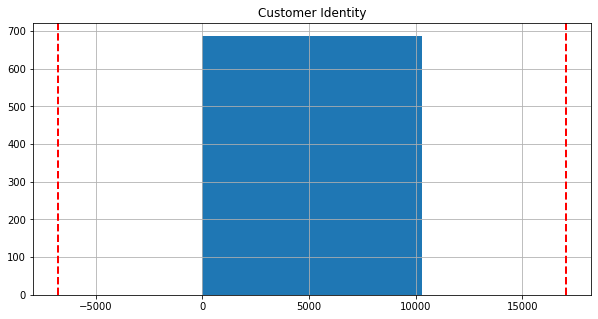

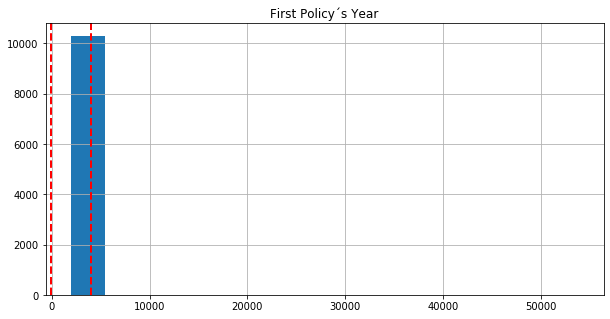

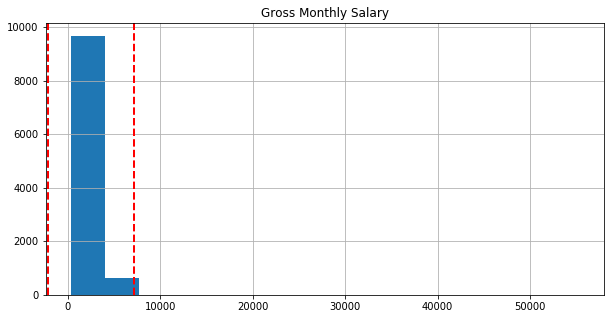

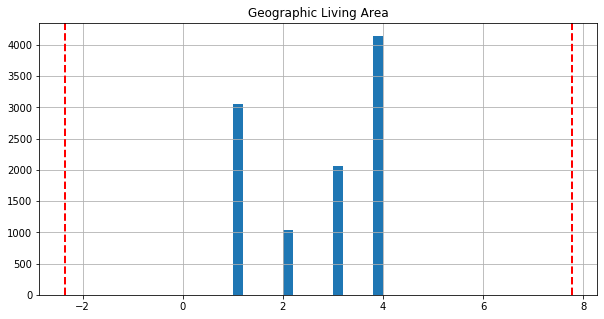

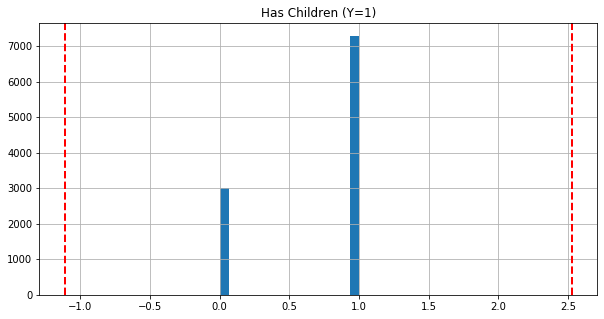

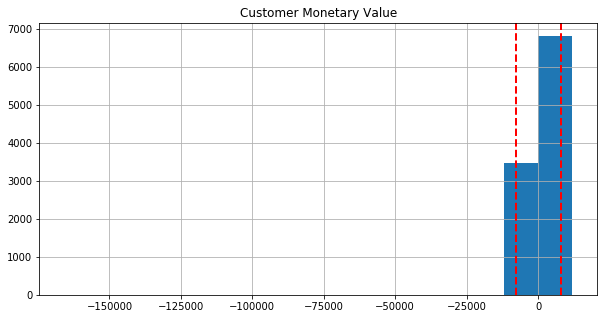

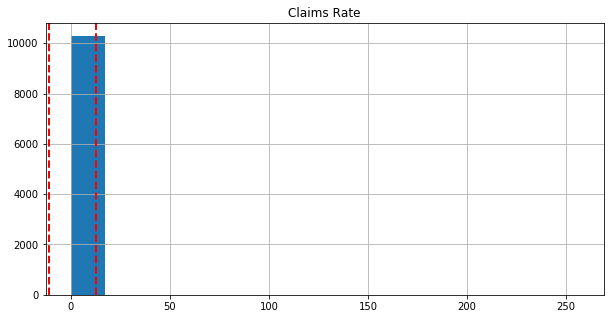

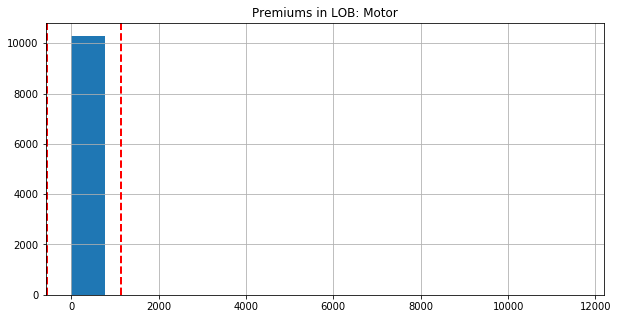

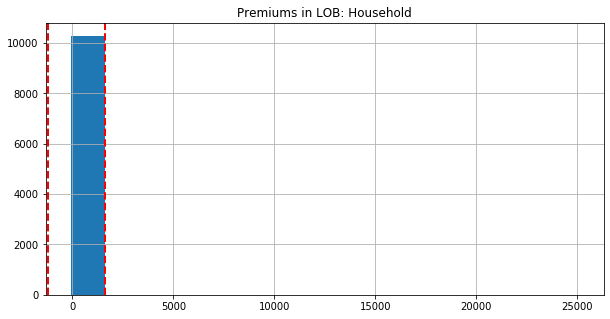

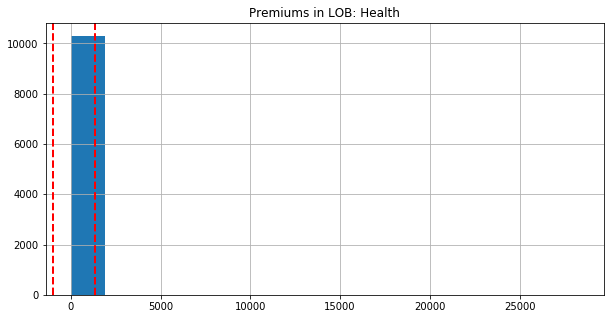

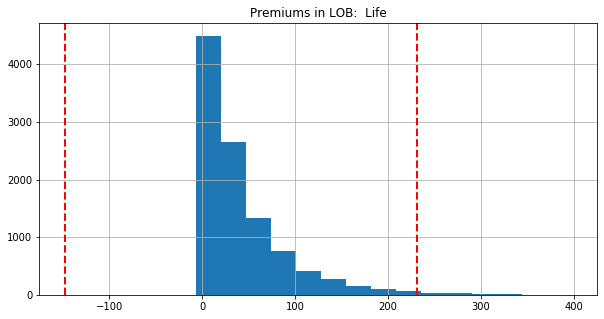

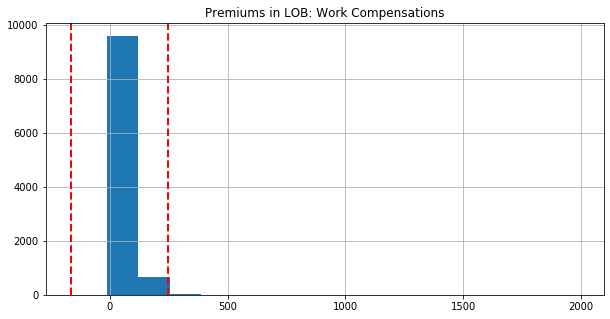

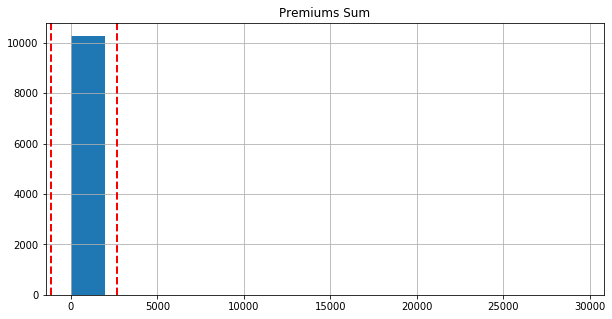

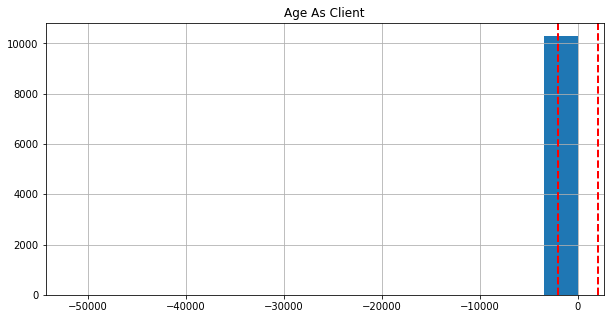

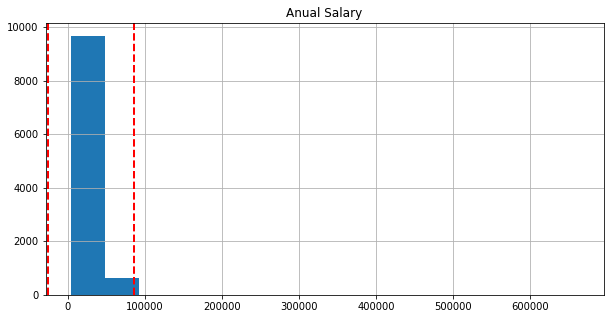

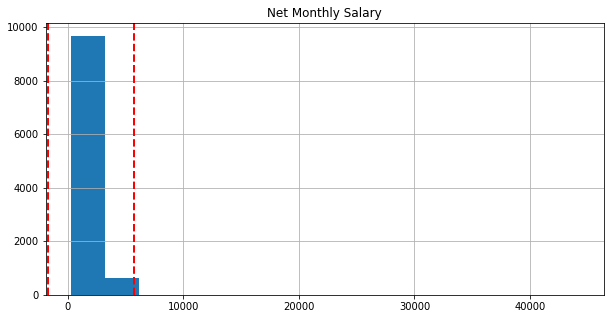

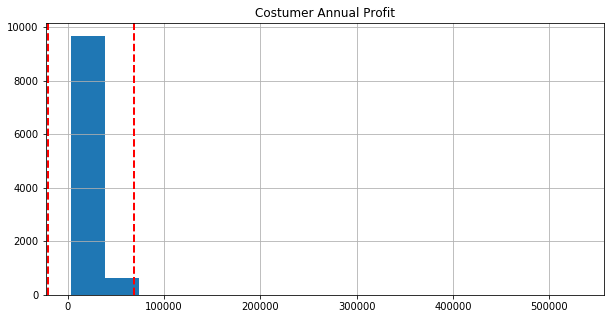

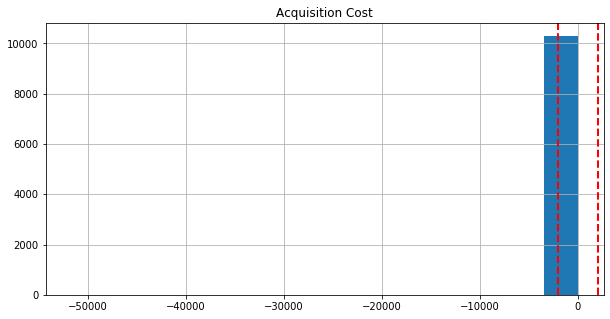

In [26]:
#Its' now proved that we really have outliers.
#Let's drop them, using th Z-score.

def col_outlier(df, threshold):
   
    outlier_counts = {}
    lower_limits = {}
    upper_limits = {}
    for i, col in enumerate(df._get_numeric_data()):
        y = df[col]
        mean_col = np.mean(y)
        std_col = np.std(y) 
        z_score = (y - mean_col)/std_col 
        is_outlier = np.abs(z_score) > threshold
        outlier_counts = np.sum(is_outlier)
        lower_limits = mean_col - std_col*threshold
        upper_limits = mean_col + std_col*threshold
        fig, axes = plt.subplots(figsize=(10, 5))
        hist_large = df[col].hist(bins=15)
        hist_large.set_title(col)
        plt.axvline(lower_limits, color='r', linestyle='dashed', linewidth=2)
        plt.axvline(upper_limits, color='r', linestyle='dashed', linewidth=2)
        #path = 'images_zscore/' + col + '.png'
        #plt.savefig(path)
        #path_image[col] = path
    return hist_large

col_outlier(df, 4.0)

In [27]:
def zscore(series):
    """Returns the Z score"""
    return (series-series.mean()) / series.std()

df.columns

Index(['Customer Identity', 'First Policy´s Year', 'Educational Degree',
       'Gross Monthly Salary', 'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Claims Rate', 'Premiums in LOB: Motor',
       'Premiums in LOB: Household', 'Premiums in LOB: Health',
       'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations',
       'Premiums Sum', 'Age As Client', 'Anual Salary', 'Net Monthly Salary',
       'Costumer Annual Profit', 'Acquisition Cost'],
      dtype='object')

In [28]:
out_1 = zscore(df['First Policy´s Year'])
out_2 = zscore(df['Gross Monthly Salary'])
out_3 = zscore(df['Customer Monetary Value'])
out_4 = zscore(df['Claims Rate'])
out_5 = zscore(df['Premiums in LOB: Motor'])
out_6 = zscore(df['Premiums in LOB: Household'])
out_7 = zscore(df['Premiums in LOB: Health'])
out_8 = zscore(df['Premiums in LOB:  Life'])
out_9 = zscore(df['Premiums in LOB: Work Compensations'])


df_out = pd.DataFrame({'First Policy Out': out_1, 'Gross Monthly Salary': out_2,
                       'Customer Monetary Value': out_3, 'Claims Rate': out_4,
                       'Premiums in LOB: Motor': out_5, 'Premiums in LOB: Household': out_6,
                       'Premiums in LOB: Health': out_7, 'Premiums in LOB:  Life': out_8,
                       'Premiums in LOB: Work Compensations': out_9})

In [29]:
df_out.shape

(10296, 9)

In [30]:
#if we consider a threshold of 3 we have 411 outliers, that represents 3,9% of the data that's too much.
#We have to consider as threshold 4.

In [31]:
df_out_1 = df_out[(df_out['First Policy Out'] > 4) | (df_out['First Policy Out'] < -4)]

#1 outlier with threshold = 3
#1 outlier with threshold = 4

list_1 = list(df_out_1.index)

In [32]:
df_out_1

,First Policy Out,Gross Monthly Salary,Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
9294,101.450868,0.658936,0.087859,-0.127795,0.244608,-0.554264,0.055764,-0.400272,-0.450133


In [33]:
df_out_2 = df_out[(df_out['Gross Monthly Salary'] > 4) | (df_out['Gross Monthly Salary'] < -4)]

#2 outliers with threshold = 3 
#2 outliers with threshold = 4

list_2 = list(df_out_2.index)

In [34]:
df_out_3 = df_out[(df_out['Customer Monetary Value'] > 4) | (df_out['Customer Monetary Value'] < -4)]

#13 outliers with threshold = 3 
#12 outliers with threshold = 4 

list_3 = list(df_out_3.index)

In [35]:
df_out_4 = df_out[(df_out['Claims Rate'] > 4) | (df_out['Claims Rate'] < -4)]

#12 outliers with threshold = 3 
#11 outliers with threshold = 4

list_4 = list(df_out_4.index)

In [36]:
df_out_5 = df_out[(df_out['Premiums in LOB: Motor'] > 4) | (df_out['Premiums in LOB: Motor'] < -4)]

#6 outliers with threshold = 3 
#6 outliers with threshold = 4

list_5 = list(df_out_5.index)

In [37]:
df_out_6 = df_out[(df_out['Premiums in LOB: Household'] > 4) | (df_out['Premiums in LOB: Household'] < -4)]

#36 outliers with threshold = 3 
#12 outliers with threshold = 4

list_6 = list(df_out_6.index)

In [38]:
df_out_7 = df_out[(df_out['Premiums in LOB: Health'] > 4) | (df_out['Premiums in LOB: Health'] < -4)]

#3 outliers with threshold = 3
#3 outliers with threshold = 4

list_7 = list(df_out_7.index)

In [39]:
df_out_8 = df_out[(df_out['Premiums in LOB:  Life'] > 4) | (df_out['Premiums in LOB:  Life'] < -4)]

#210 outliers with threshold = 3
#79 outliers with threshold = 4
list_8 = list(df_out_8.index)

In [40]:
df_out_9 = df_out[(df_out['Premiums in LOB: Work Compensations'] > 4) | (df_out['Premiums in LOB: Work Compensations'] < -4)]

#162 outliers with threshold = 3
#62 outliers with threshold = 4

list_9 = list(df_out_9.index)

In [41]:
list_dummy = list_1 + list_2 + list_3 + list_4 + list_5 + list_6 + list_7 + list_8 + list_9

list_to_remove = []

for i in list_dummy:
  if i not in list_to_remove:
    list_to_remove.append(i)


In [42]:
#How many outliers after all? 173 and 410

len(list_to_remove)

#173 outliers represent 1,6% of the data, which is acceptable.
#411 outliers represent 3,9% of the data, is acceptable?
#Let's drop them.

173

In [43]:
for i in list_to_remove:
    df = df.drop([df.index[i]]) #10112

In [44]:
df.shape
#We have now 10123 rows on the database.

(10123, 19)

In [45]:
df.duplicated().sum()
#No duplicated rows.
df['Customer Identity'].duplicated().sum()
#This means that we don't have duplicated client, each row defines a unique client.

0

In [46]:
#We can't have the Premiums Sum greater than the Anual Salary

df[df['Premiums Sum'] > df['Anual Salary']]

#Let's drop this row.
df = df.drop([df.index[9149]])

In [47]:
df.shape
#After cleaning the data we have now 10122 rows and 19 columns.
#It means we dropped 1,6% of the data. PERFECT!!


(10122, 19)

## Data set division

We are going to split the data set in two:
Product Variables and Costumers Variables
And we're about to performe cluster technique in each set of variables individually.

Product Variables:
'Premiums in LOB: Motor',
'Premiums in LOB: Household', 
'Premiums in LOB: Health',
'Premiums in LOB:  Life', 
'Premiums in LOB: Work Compensations

Costumers Variables:
'First Policy´s Year', 
'Educational Degree',
'Gross Monthly Salary', 
'Geographic Living Area', 
'Has Children (Y=1)',
'Customer Monetary Value', 
'Claims Rate'
'Age As Client', 
'Anual Salary', 
'Net Monthly Salary',
'Costumer Annual Profit', 
'Acquisition Cost',
Premiums Sum


But, do we need all these variables?

## Feature Selection

Product Variables

In [48]:
df_product = df[['Premiums in LOB: Motor', 'Premiums in LOB: Household', 
                 'Premiums in LOB: Health', 'Premiums in LOB:  Life', 
                 'Premiums in LOB: Work Compensations']]

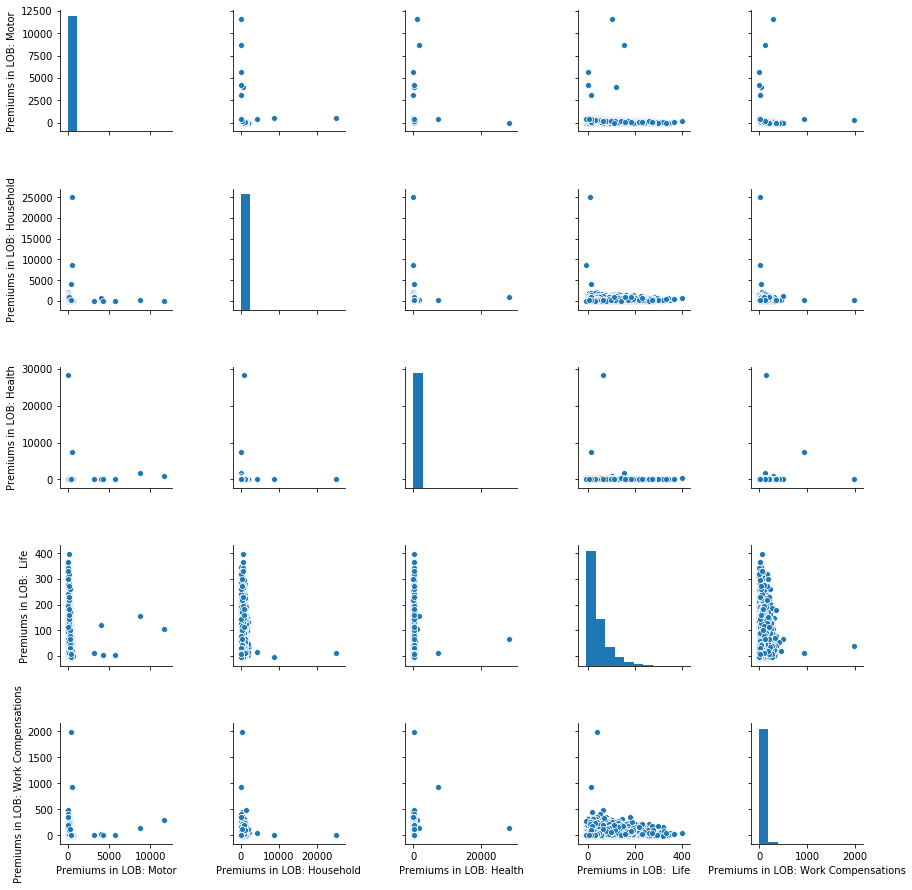

In [49]:
#sns.set(rc={'figure.figsize':(0.001, 0.001)})
#sns.set(style="ticks", color_codes=True)

sns.pairplot(df_product)

plt.show()

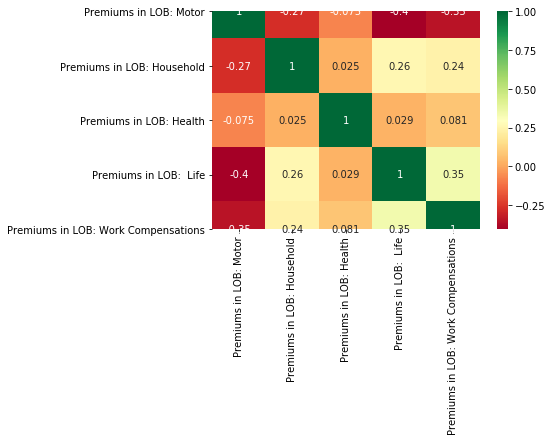

In [50]:
correlation = df_product.corr()

sns.heatmap(correlation, annot = True, cmap = "RdYlGn")

#There is no correlation between the premiuns.

## PCA 

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_product)


from sklearn.decomposition import PCA

pca = PCA(n_components= df_product.shape[1])

pc = pca.fit_transform(X_scaled)

In [52]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39108886, 0.59015271, 0.74750559, 0.88160965, 1.        ])

In [53]:
pca.components_
# Premiums in LOB: Motor, Premiums in LOB: Household, Premiums in LOB: Health, Premiums in LOB:  Life, Premiums in LOB: Work Compensations

array([[-0.53214806,  0.42352327,  0.11083061,  0.52557052,  0.49893755],
       [ 0.01089972, -0.1432055 ,  0.98158942, -0.11916942,  0.04067225],
       [ 0.19672462,  0.89182107,  0.10623722, -0.27469397, -0.28144532],
       [ 0.42729342,  0.05758408, -0.07562772, -0.3740038 ,  0.81762217],
       [ 0.70386035,  0.03820294,  0.08481084,  0.70302109, -0.04110477]])

In [54]:
df_pca = pd.DataFrame(pca.components_, columns = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5'])
df_pca

,PC_1,PC_2,PC_3,PC_4,PC_5
0,-0.532148,0.423523,0.110831,0.525571,0.498938
1,0.010900,-0.143206,0.981589,-0.119169,0.040672
2,0.196725,0.891821,0.106237,-0.274694,-0.281445
3,0.427293,0.057584,-0.075628,-0.374004,0.817622
4,0.703860,0.038203,0.084811,0.703021,-0.041105


In [55]:
pca.singular_values_

array([140.68762229, 100.37241526,  89.23916655,  82.38329122,
        77.40630251])

In [56]:
pca.inverse_transform(pc)

array([[ 3.58053647e-01, -3.70705699e-01, -8.21762325e-02,
         1.18276388e-01, -4.67396612e-01],
       [-1.04055862e+00,  5.79350415e-01, -1.81621944e-01,
         3.23156929e+00,  1.26176713e+00],
       [-4.37363431e-01,  3.85166893e-02, -1.55176825e-01,
         9.48797461e-01,  1.12399982e+00],
       ...,
       [ 4.88263938e-01, -2.20191984e-01, -9.59518265e-02,
        -6.06687865e-01, -6.99915268e-01],
       [-5.19670584e-01,  8.52994866e-04,  9.21470380e-02,
         4.74847332e-01,  1.39314017e+00],
       [ 5.37245131e-01, -3.28386941e-01, -9.93035525e-02,
        -7.28711551e-01, -5.44902831e-01]])

Conclusions:

No variables can be removed. (?)




In [57]:
df_product.to_csv('data.csv', index = False)

In [58]:
df_product.columns

Index(['Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations'],
      dtype='object')

## Clustering

K-means

In [59]:
from sklearn.cluster import KMeans

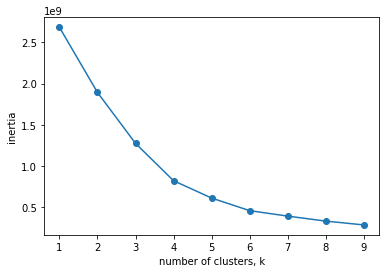

In [60]:
ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    # Fit model to samples
    model.fit(df_product)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [61]:
from sklearn.preprocessing import StandardScaler

#elbow graph says 4 clusters

scaler = StandardScaler()

cluster_Norm = scaler.fit_transform(df_product)

CA_Norm = pd.DataFrame(cluster_Norm, columns = df_product.columns)

# Create a KMeans model with 4 clusters: model
model = KMeans(n_clusters = 4)


# Use fit_predict to fit model and obtain cluster labels: labels
model = model.fit(CA_Norm)


#Check the Clusters
#The centroids
my_clusters = model.cluster_centers_

inv_clusters = scaler.inverse_transform(X = my_clusters)

In [62]:
my_real_clusters = pd.DataFrame(my_clusters, columns = df_product.columns)
my_real_clusters

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,0.286928,-0.248980,-0.030284,-0.421007,-0.360169
1,-1.280168,1.744104,94.187263,0.512426,1.884142
2,-0.759346,0.633132,0.046379,1.114396,0.952835
3,0.979482,70.074086,-0.451302,-0.665377,-0.564279


In [63]:
my_real_clusters_inv = pd.DataFrame(inv_clusters, columns = df_product.columns)
my_real_clusters_inv

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,360.675545,122.595950,161.842176,21.465312,22.423906
1,26.340000,829.050000,28272.000000,65.680000,138.250000
2,137.455892,435.263009,184.714926,94.194032,90.186418
3,508.430000,25048.800000,36.230000,9.890000,11.890000


In [64]:
my_clusters = pd.DataFrame(model.cluster_centers_)
my_clusters

,0,1,2,3,4
0,0.286928,-0.248980,-0.030284,-0.421007,-0.360169
1,-1.280168,1.744104,94.187263,0.512426,1.884142
2,-0.759346,0.633132,0.046379,1.114396,0.952835
3,0.979482,70.074086,-0.451302,-0.665377,-0.564279


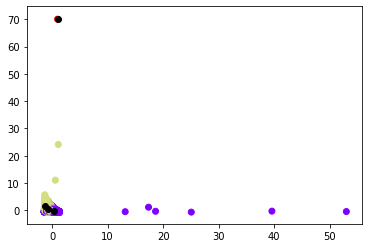

In [65]:
#We're using 4 dimentions, it's no worth trying to visualize.

plt.scatter(CA_Norm.iloc[:, 0].values, CA_Norm.iloc[:, 1].values, c=model.labels_, cmap='rainbow') #c=kmeans, cmap='viridis')
# add centroids
plt.scatter(my_clusters.iloc[:, 0].values, my_clusters.iloc[:, 1].values, c='black')

plt.show()

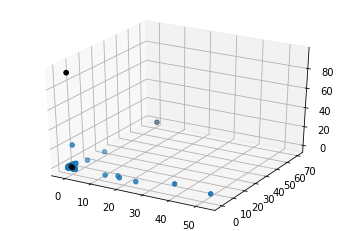

In [66]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = CA_Norm.iloc[:, 0].values
y = CA_Norm.iloc[:, 1].values
z = CA_Norm.iloc[:, 2].values

c1 = my_clusters.iloc[:, 0]
c2 = my_clusters.iloc[:, 1]
c3 = my_clusters.iloc[:, 2]

ax.scatter(x, y, z, cmap='rainbow', marker='o')
ax.scatter(c1, c2, c3, c = 'black', marker = 'o')

#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

plt.show()

Silhouette

In [69]:
# Check clusters a bit further

from sklearn.metrics import silhouette_samples, silhouette_score

for n_clusters in range(2, 10):
    
    silhouette_avg = silhouette_score(CA_Norm, model.labels_)


    print("For n_clusters =", n_clusters,
         ", the average silhouette_score is:", silhouette_avg)

    # Compute the silhouette scores for each sample
    #sample_silhouette_values = silhouette_samples(CA_Norm, model.labels_)
    #print(sample_silhouette_values)

For n_clusters = 2 , the average silhouette_score is: 0.4664980360516213
For n_clusters = 3 , the average silhouette_score is: 0.4664980360516213
For n_clusters = 4 , the average silhouette_score is: 0.4664980360516213
For n_clusters = 5 , the average silhouette_score is: 0.4664980360516213
For n_clusters = 6 , the average silhouette_score is: 0.4664980360516213
For n_clusters = 7 , the average silhouette_score is: 0.4664980360516213
For n_clusters = 8 , the average silhouette_score is: 0.4664980360516213
For n_clusters = 9 , the average silhouette_score is: 0.4664980360516213


NameError: name 'sample_silhouette_values' is not defined

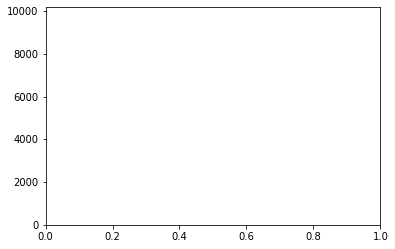

In [70]:
import matplotlib.cm as cm

y_lower = 100
fig = plt.figure()
ax = fig.add_subplot(111)

n_clusters = 4

ax.set_ylim([0, CA_Norm.shape[0] + (n_clusters + 1) * 10])

for i in range(2,5):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.rainbow(float(i) / i)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color,
                    edgecolor=color,
                    alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 100
    
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    
plt.show()

## Hierarchical cluster

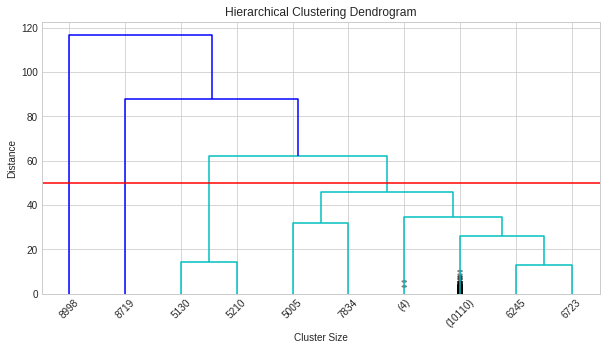

In [71]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from pylab import rcParams

from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
# Scipy generate dendrograms
Z = linkage(CA_Norm, method='complete')

#Complete: The distance between two clusters is the longest distance between two points in each cluster.

hierarchy.set_link_color_palette(['c', 'm', 'y', 'g','b','r','k'])

dendrogram(Z,
          truncate_mode='lastp',
          p=10,
          orientation='top',
          leaf_rotation=45,
          leaf_font_size=10,
          show_contracted=True,
          show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=50, color = 'red')
plt.show()

Agglomerative Hierarchical clustering Technique: 
In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

In [181]:
Hclustering = AgglomerativeClustering(n_clusters= 4,
                                      affinity= 'euclidean',
                                      linkage= 'ward')

#Replace the test with proper data
my_HC = Hclustering.fit(CA_Norm)

my_labels = pd.DataFrame(my_HC.labels_)
my_labels.columns =  ['Labels']


# Do the necessary transformations
affinity = pd.DataFrame(pd.concat([pd.DataFrame(CA_Norm), my_labels], axis = 1),
                        columns = ['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health', 
                                   'Premiums in LOB:  Life','Premiums in LOB: Work Compensations', 'Labels'])

to_revert = affinity.groupby('Labels')['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health', 
                                       'Premiums in LOB:  Life','Premiums in LOB: Work Compensations'].mean()
#print(to_revert)

final_result = pd.DataFrame(scaler.inverse_transform(X = to_revert), columns = df_product.columns)
final_result

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,422.335172,71.352176,132.061711,13.090484,13.888353
1,193.468991,326.503672,199.216172,65.837670,64.398342
2,26.340000,829.050000,28272.000000,65.680000,138.250000
3,508.430000,25048.800000,36.230000,9.890000,11.890000


## DBSCAN

1
[[   -1     0]
 [    1 10121]]


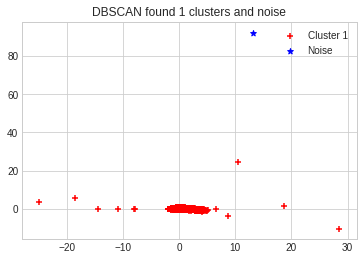

In [182]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps= 50,
            min_samples=10).fit(cluster_Norm)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)


unique_clusters, counts_clusters = np.unique(db.labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)))
# table results: -1 is noise, get two clusters
# biggest cluster: 8904, decrease radius/eps to 0.5 --> 4 clusters
# try even smaller radius: 0.25 --> even more noise: 4670 and a few clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(cluster_Norm)
pca_2d = pca.transform(cluster_Norm)
for i in range(0, pca_2d.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    #elif db.labels_[i] == 1:
        #c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    #elif db.labels_[i] == 2:
        #c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='k',marker='v')
    #elif db.labels_[i] == 3:
        #c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='s')
    #elif db.labels_[i] == 4:
        #c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m',marker='p')
    #elif db.labels_[i] == 5:
        #c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c',marker='H')
    elif db.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1, c3], ['Cluster 1','Noise'])
plt.title('DBSCAN found 1 clusters and noise')
plt.show()

#this method is not good for continuous values, that's the product variables case.

## SOM

In [183]:
df_product.columns

Index(['Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations'],
      dtype='object')

In [73]:
from sompy.sompy import SOMFactory
from sompy.visualization.plot_tools import plot_hex_map
import logging

X = CA_Norm.values

names = ['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health', 'Premiums in LOB:  Life',
         'Premiums in LOB: Work Compensations']

sm = SOMFactory().build(data = X,
               mapsize=(10,10),
               normalization = 'var',
               initialization='pca',
               component_names = names,
               lattice='hexa',
               training ='seq' )#'seq','batch'

sm.train(n_job=4,
         verbose='info',
         train_rough_len=30,
         train_finetune_len=100)

 Training...
 pca_linear_initialization took: 0.012000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 30

 epoch: 1 ---> elapsed time:  0.128000, quantization error: 0.836380

 epoch: 2 ---> elapsed time:  0.134000, quantization error: 1.109897

 epoch: 3 ---> elapsed time:  0.128000, quantization error: 0.988212

 epoch: 4 ---> elapsed time:  0.127000, quantization error: 0.968595

 epoch: 5 ---> elapsed time:  0.128000, quantization error: 0.953281

 epoch: 6 ---> elapsed time:  0.128000, quantization error: 0.938309

 epoch: 7 ---> elapsed time:  0.132000, quantization error: 0.924457

 epoch: 8 ---> elapsed time:  0.133000, quantization error: 0.911764

 epoch: 9 ---> elapsed time:  0.128000, quantization error: 0.899560

 epoch: 10 ---> elapsed time:  0.138000, quantization error: 0.887394

 epoch: 11 ---> elapsed time:  0.133000, quantization error: 0.874990

 epoch: 12 ---> elapsed time:  0.127000, quantization error: 0.862331

 epoch: 13 --

In [75]:
final_clusters = pd.DataFrame(sm._data, columns = names)

my_labels = pd.DataFrame(sm._bmu[0])

final_clusters = pd.concat([final_clusters, my_labels], axis = 1)

final_clusters.columns = ['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health', 'Premiums in LOB:  Life',
                          'Premiums in LOB: Work Compensations', 'Lables']

#final_clusters

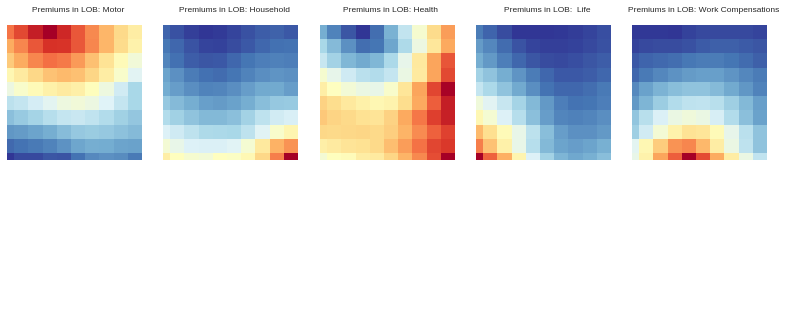

In [76]:
from sompy.visualization.mapview import View2DPacked
view2D  = View2DPacked(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, what = 'codebook',)
plt.show()

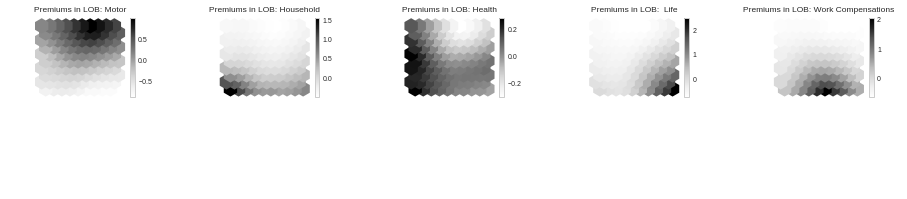

In [77]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, what = 'codebook',)
plt.show()

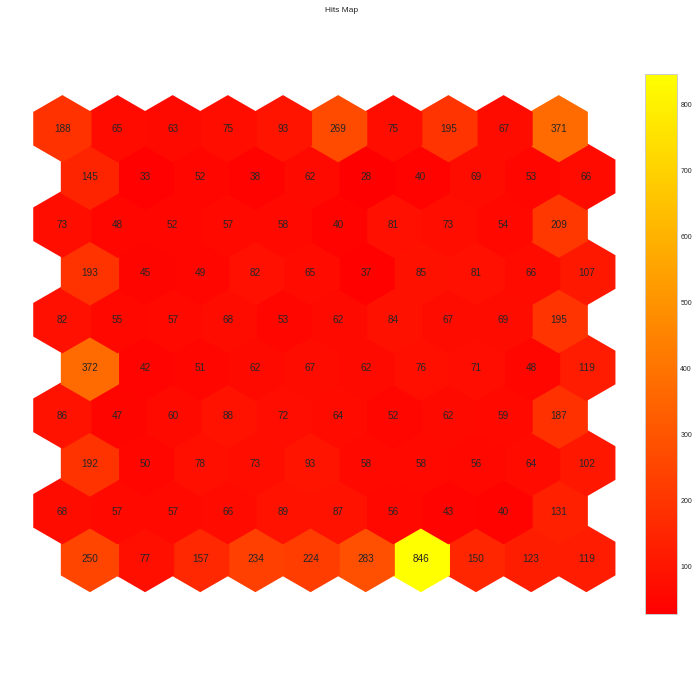

In [78]:
from sompy.visualization.bmuhits import BmuHitsView
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)

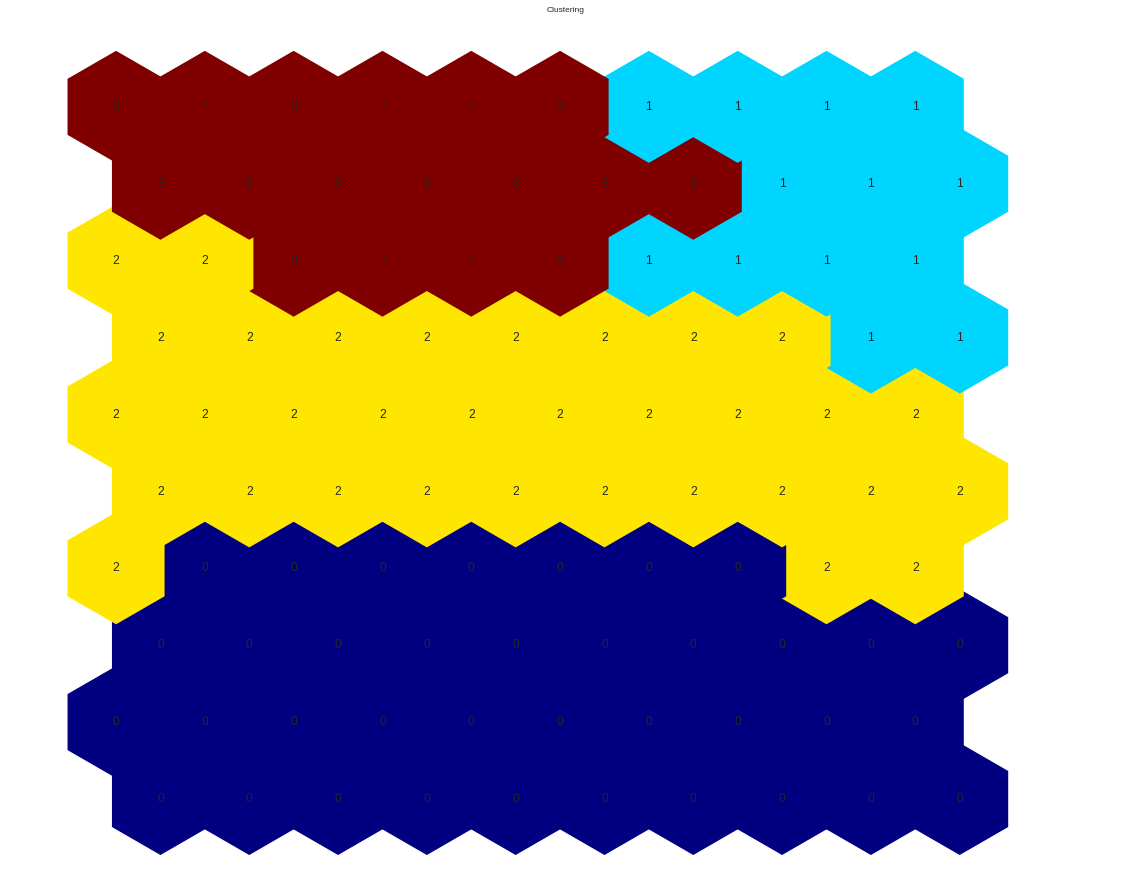

In [86]:
# K-Means Clustering --> better with hierartical 
from sompy.visualization.hitmap import HitMapView
sm.cluster(4)
hits  = HitMapView(20,20,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)

## Mean-shift


Mean Shift is a hierarchical clustering algorithm.
As opposed to K-Means, when using Mean Shift, you don’t need to know the number of categories (clusters) beforehand.

How it works:

- Define a window (bandwidth of the kernel) and place the window on a data point.
- Calculate the mean for all the points in the window.
- Move the center of the window to the location of the mean.
-  Repeat steps 2 and 3 until there is convergence

In [95]:
from sklearn.cluster import MeanShift, estimate_bandwidth


to_MS = CA_Norm

# The following bandwidth can be automatically detected using
my_bandwidth = estimate_bandwidth(to_MS, quantile=0.2, n_samples=1000)

ms = MeanShift(bandwidth=my_bandwidth,
               #bandwidth=0.15,
               bin_seeding=True)

ms.fit(to_MS)

labels = ms.labels_


cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("The number of clusters is: ", n_clusters_) # 20 clusters 


#Values
scaler.inverse_transform(X=cluster_centers)

#Count
unique, counts = np.unique(labels, return_counts=True)

print(np.asarray((unique, counts)).T)

The number of clusters is:  20
[[   0 8537]
 [   1  812]
 [   2  179]
 [   3  199]
 [   4  210]
 [   5   17]
 [   6  155]
 [   7    1]
 [   8    1]
 [   9    1]
 [  10    1]
 [  11    1]
 [  12    1]
 [  13    1]
 [  14    1]
 [  15    1]
 [  16    1]
 [  17    1]
 [  18    1]
 [  19    1]]


In [102]:
# lets check our are they distributed

pca = PCA(n_components=3).fit(to_MS)
pca_2d = pca.transform(to_MS)

print(pca_2d.shape[0])

10122


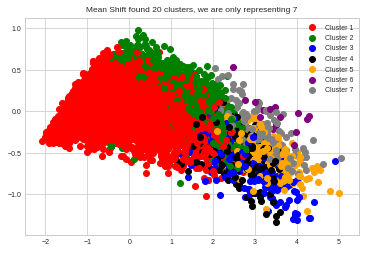

In [107]:
for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif labels[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif labels[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='o')
    elif labels[i] == 3:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='black',marker='o')
    elif labels[i] == 4:
        c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='orange',marker='o')
    elif labels[i] == 5:
        c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='purple',marker='o') 
    elif labels[i] == 6:
        c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='gray',marker='o')
    

plt.legend([c1, c2, c3, c4, c5, c6, c7], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5',
                                         'Cluster 6', 'Cluster 7'])
plt.title('Mean Shift found 20 clusters, we are only representing 7')
plt.show()

## Costumer Variables

## converting everything to numbers

In [12]:
df['Education'].unique()

array(['2 - High School', '1 - Basic', '3 - BSc/MSc', '4 - PhD'],
      dtype=object)

In [13]:
df['Education'] = df['Education'].map({'1 - Basic':1,'2 - High School':2,'3 - BSc/MSc':3,'4 - PhD':4})

In [14]:
df['Education'].unique()

array([2, 1, 3, 4])

## discretization

In [126]:
df['Discr_Age'] = df['Age']
df['Discr_Age'] = df['Discr_Age'].map(lambda x: (x//10)*10)

In [127]:
df

,ID,First_Policy,Birthday,Education,Salary,Area,Children,CMV,Claims,Motor,Household,Health,Life,Work_Compensation,Premiums_Sum,Age,Age_as_Client,Anual_Salary,Discr_Age
0,1,1985.0,1982.0,2,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56,34.0,31.0,26124.0,30.0
1,4,1990.0,1981.0,3,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68,35.0,26.0,13188.0,30.0
2,5,1986.0,1973.0,3,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24,43.0,30.0,21156.0,40.0
3,6,1986.0,1956.0,2,2566.0,4.0,1.0,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,589.12,60.0,30.0,30792.0,60.0
4,7,1979.0,1943.0,2,4103.0,4.0,0.0,-66.01,1.05,156.92,295.60,317.95,14.67,26.34,811.48,73.0,37.0,49236.0,70.0
5,8,1988.0,1974.0,2,1743.0,4.0,1.0,-144.91,1.13,248.27,397.30,144.36,66.68,53.23,909.84,42.0,28.0,20916.0,40.0
6,9,1981.0,1978.0,3,1862.0,1.0,1.0,356.53,0.36,344.51,18.35,210.04,8.78,9.89,591.57,38.0,35.0,22344.0,30.0
7,10,1976.0,1948.0,3,3842.0,1.0,0.0,-119.35,1.12,209.26,182.25,271.94,39.23,55.12,757.80,68.0,40.0,46104.0,60.0
8,11,1990.0,1945.0,3,3995.0,4.0,0.0,290.17,0.53,296.50,116.70,227.71,18.67,10.89,670.47,71.0,26.0,47940.0,70.0
9,12,1985.0,1958.0,3,2834.0,3.0,1.0,405.74,0.46,249.49,216.70,252.38,36.34,35.45,790.36,58.0,31.0,34008.0,50.0


In [128]:
df['Discr_Client_Age'] = df['Age_as_Client']
df['Discr_Client_Age'] = df['Discr_Client_Age'].map(lambda x: (x//10)*10)

In [129]:
df

,ID,First_Policy,Birthday,Education,Salary,Area,Children,CMV,Claims,Motor,Household,Health,Life,Work_Compensation,Premiums_Sum,Age,Age_as_Client,Anual_Salary,Discr_Age,Discr_Client_Age
0,1,1985.0,1982.0,2,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56,34.0,31.0,26124.0,30.0,30.0
1,4,1990.0,1981.0,3,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68,35.0,26.0,13188.0,30.0,20.0
2,5,1986.0,1973.0,3,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24,43.0,30.0,21156.0,40.0,30.0
3,6,1986.0,1956.0,2,2566.0,4.0,1.0,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,589.12,60.0,30.0,30792.0,60.0,30.0
4,7,1979.0,1943.0,2,4103.0,4.0,0.0,-66.01,1.05,156.92,295.60,317.95,14.67,26.34,811.48,73.0,37.0,49236.0,70.0,30.0
5,8,1988.0,1974.0,2,1743.0,4.0,1.0,-144.91,1.13,248.27,397.30,144.36,66.68,53.23,909.84,42.0,28.0,20916.0,40.0,20.0
6,9,1981.0,1978.0,3,1862.0,1.0,1.0,356.53,0.36,344.51,18.35,210.04,8.78,9.89,591.57,38.0,35.0,22344.0,30.0,30.0
7,10,1976.0,1948.0,3,3842.0,1.0,0.0,-119.35,1.12,209.26,182.25,271.94,39.23,55.12,757.80,68.0,40.0,46104.0,60.0,40.0
8,11,1990.0,1945.0,3,3995.0,4.0,0.0,290.17,0.53,296.50,116.70,227.71,18.67,10.89,670.47,71.0,26.0,47940.0,70.0,20.0
9,12,1985.0,1958.0,3,2834.0,3.0,1.0,405.74,0.46,249.49,216.70,252.38,36.34,35.45,790.36,58.0,31.0,34008.0,50.0,30.0


In [130]:
df['Discr_Salary'] = df['Salary']
df['Discr_Salary'] = df['Discr_Salary'].map(lambda x: (x//500)*500)

In [131]:
df

,ID,First_Policy,Birthday,Education,Salary,Area,Children,CMV,Claims,Motor,...,Health,Life,Work_Compensation,Premiums_Sum,Age,Age_as_Client,Anual_Salary,Discr_Age,Discr_Client_Age,Discr_Salary
0,1,1985.0,1982.0,2,2177.0,1.0,1.0,380.97,0.39,375.85,...,146.36,47.01,16.89,665.56,34.0,31.0,26124.0,30.0,30.0,2000.0
1,4,1990.0,1981.0,3,1099.0,4.0,1.0,-16.99,0.99,182.48,...,311.17,35.34,28.34,600.68,35.0,26.0,13188.0,30.0,20.0,1000.0
2,5,1986.0,1973.0,3,1763.0,4.0,1.0,35.23,0.90,338.62,...,182.59,18.78,41.45,629.24,43.0,30.0,21156.0,40.0,30.0,1500.0
3,6,1986.0,1956.0,2,2566.0,4.0,1.0,-24.33,1.00,440.75,...,114.80,7.00,7.67,589.12,60.0,30.0,30792.0,60.0,30.0,2500.0
4,7,1979.0,1943.0,2,4103.0,4.0,0.0,-66.01,1.05,156.92,...,317.95,14.67,26.34,811.48,73.0,37.0,49236.0,70.0,30.0,4000.0
5,8,1988.0,1974.0,2,1743.0,4.0,1.0,-144.91,1.13,248.27,...,144.36,66.68,53.23,909.84,42.0,28.0,20916.0,40.0,20.0,1500.0
6,9,1981.0,1978.0,3,1862.0,1.0,1.0,356.53,0.36,344.51,...,210.04,8.78,9.89,591.57,38.0,35.0,22344.0,30.0,30.0,1500.0
7,10,1976.0,1948.0,3,3842.0,1.0,0.0,-119.35,1.12,209.26,...,271.94,39.23,55.12,757.80,68.0,40.0,46104.0,60.0,40.0,3500.0
8,11,1990.0,1945.0,3,3995.0,4.0,0.0,290.17,0.53,296.50,...,227.71,18.67,10.89,670.47,71.0,26.0,47940.0,70.0,20.0,3500.0
9,12,1985.0,1958.0,3,2834.0,3.0,1.0,405.74,0.46,249.49,...,252.38,36.34,35.45,790.36,58.0,31.0,34008.0,50.0,30.0,2500.0


## redundancy

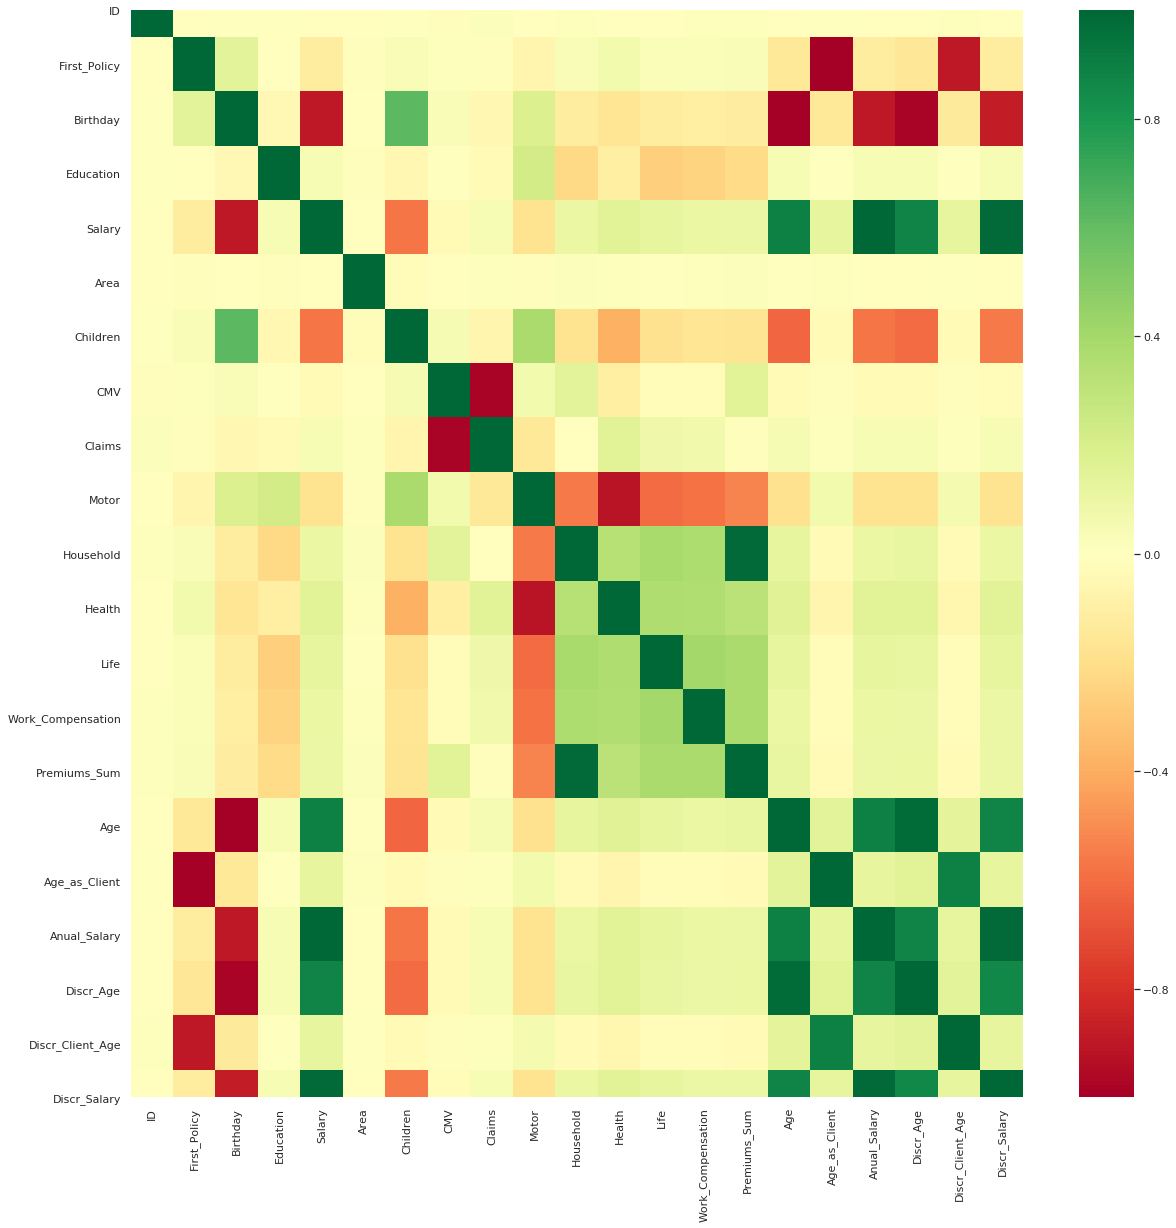

In [135]:
df_corr = df #[['First_Policy','Birthday','Education','Salary','Area','Children','CMV','Claims','Motor','Household','Health','Life','Work_Compensation']]
correlation = df_corr.corr()
plt.figure(figsize=(20,20))
sb.heatmap(correlation,cmap="RdYlGn")

In [150]:
# correlation between birthday and salary
correlation.loc['Birthday','Salary']

-0.8928252301744717

we should drop salary from the analysis since birthday is an essential data point for premium calculation #BusinessInsightYo

In [151]:
# correlation between CMV and claims
correlation.loc['CMV','Claims']

-0.9806674311316281

we should drop the claims because keeping cmv provides a clearer break between customer and product data

In [152]:
# correlation between motor and health
correlation.loc['Motor','Health']

-0.9148975131204349

In [153]:
corrs1 = []
corrs2 = []

for premium in ['Motor','Household','Health','Life','Work_Compensation']:
    corrs1.append(correlation.loc['Motor',premium])
    corrs2.append(correlation.loc['Health',premium])
    
print(corrs1)
print(corrs2)

# we should probably eliminate motor since it's more correlated with the other product variables

[1.0, -0.5581507347339831, -0.9148975131204349, -0.6084782558177626, -0.578572469553066]
[-0.9148975131204349, 0.33136925880373863, 1.0, 0.3653710222735296, 0.3592537785815981]


we can eliminate one variable from each pair of variables since they explain each other

FIND EXPLANATIONS!!

# Clustering Metrics - CLIENT VARIABLES 

In [379]:
#Discretization
df['Discr_cmv'] = df['CMV'].map(lambda x: (x//50)*50)

In [389]:
costumers_var = ['Education', 'Area', 'Children', 'Discr_cmv', 'Discr_Age', 'Discr_Client_Age']

CostAff = df.loc[:, ['Education', 'Area', 'Children', 'Discr_cmv', 'Discr_Age', 'Discr_Client_Age']]

In [390]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

CA_Norm = scaler.fit_transform(CostAff)

CA_Norm = pd.DataFrame(CA_Norm, columns = CostAff.columns)

K-Modes

In [382]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=3, init='random', n_init=50, verbose=1)

clusters = km.fit_predict(CA_Norm)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1339, cost: 16973.0
Run 1, iteration: 2/100, moves: 0, cost: 16973.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1015, cost: 17315.0
Run 2, iteration: 2/100, moves: 0, cost: 17315.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1134, cost: 18108.0
Run 3, iteration: 2/100, moves: 0, cost: 18108.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 915, cost: 17328.0
Run 4, iteration: 2/100, moves: 0, cost: 17328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1820, cost: 18804.0
Run 5, iteration: 2/100, moves: 0, cost: 18804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration

DBSCAN

In [383]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps= 1,
            min_samples=150).fit(CA_Norm)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)

unique_clusters, counts_clusters = np.unique(db.labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)))
# table results: -1 is noise, get two clusters
# biggest cluster: 8904, decrease radius/eps to 0.5 --> 4 clusters
# try even smaller radius: 0.25 --> even more noise: 4670 and a few clusters

5
[[  -1    0    1    2    3    4]
 [4677  726  532  151  151  151]]


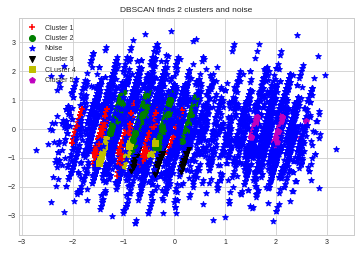

In [384]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3).fit(CA_Norm)
pca_2d = pca.transform(CA_Norm)

for i in range(0, pca_2d.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif db.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif db.labels_[i] == 2:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='k',marker='v')
    elif db.labels_[i] == 3:
        c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='s')
    elif db.labels_[i] == 4:
        c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m',marker='p')
    #elif db.labels_[i] == 5:
        #c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c',marker='H')
    elif db.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1, c2, c3, c4, c5, c6], ['Cluster 1', 'Cluster 2','Noise', 'Cluster 3', 'CLuster 4', 'Cluster 5'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

SOM

In [391]:
from sompy.sompy import SOMFactory
from sompy.visualization.plot_tools import plot_hex_map
import logging

#print(CA_Norm)

X = CA_Norm.values

sm = SOMFactory().build(data = X,
               mapsize=(10,10),
               normalization = 'var',
               initialization='random',#'random', 'pca'
               component_names = costumers_var,
               lattice='rect',#'rect','hexa'
               training ='seq' )#'seq','batch'

sm.train(n_job=3,
         verbose='info',
         train_rough_len=30,
         train_finetune_len=100)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 30

 epoch: 1 ---> elapsed time:  0.106000, quantization error: 1.500054

 epoch: 2 ---> elapsed time:  0.136000, quantization error: 2.247785

 epoch: 3 ---> elapsed time:  0.125000, quantization error: 1.909108

 epoch: 4 ---> elapsed time:  0.114000, quantization error: 1.860188

 epoch: 5 ---> elapsed time:  0.122000, quantization error: 1.838128

 epoch: 6 ---> elapsed time:  0.119000, quantization error: 1.823239

 epoch: 7 ---> elapsed time:  0.120000, quantization error: 1.808122

 epoch: 8 ---> elapsed time:  0.121000, quantization error: 1.790635

 epoch: 9 ---> elapsed time:  0.120000, quantization error: 1.771029

 epoch: 10 ---> elapsed time:  0.119000, quantization error: 1.750188

 epoch: 11 ---> elapsed time:  0.125000, quantization error: 1.730338

 epoch: 12 ---> elapsed time:  0.119000, quantization error: 1.711258

 epoch: 13 ---> e

In [393]:
final_clusters = pd.DataFrame(sm._data, columns = costumers_var)

my_labels = pd.DataFrame(sm._bmu[0])

final_clusters = pd.concat([final_clusters, my_labels], axis = 1)

#print(final_clusters)

final_clusters.columns = ['Education', 'Area', 'Children', 'Discr_cmv', 'Discr_Age', 'Discr_Client_Age', 'Labels']

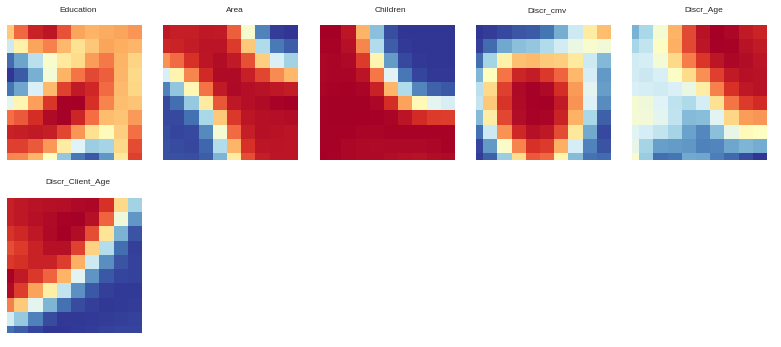

In [394]:
from sompy.visualization.mapview import View2DPacked
view2D  = View2DPacked(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, what = 'codebook',)#which_dim="all", denormalize=True)
plt.show()

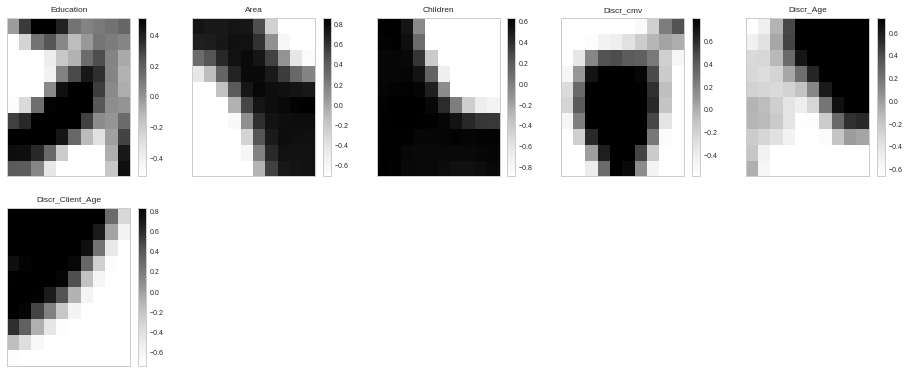

In [395]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, what = 'codebook',)#which_dim="all", denormalize=True)
plt.show()

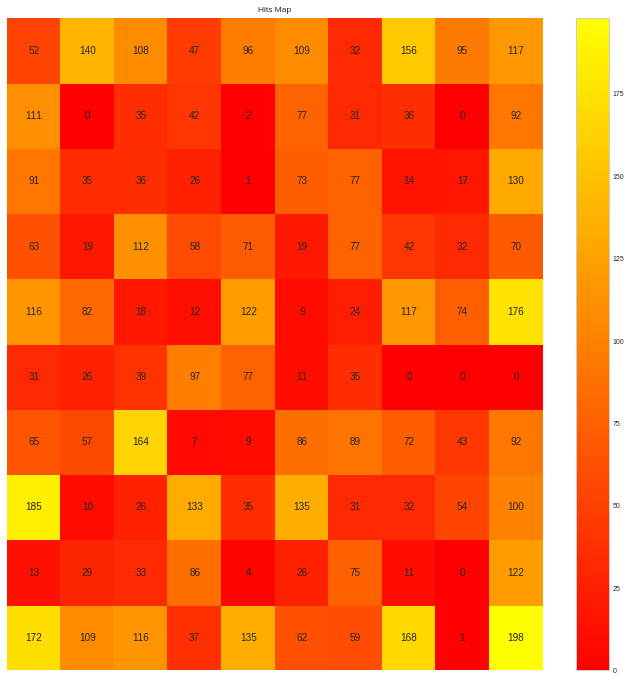

In [396]:
from sompy.visualization.bmuhits import BmuHitsView
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)

/home/cat/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


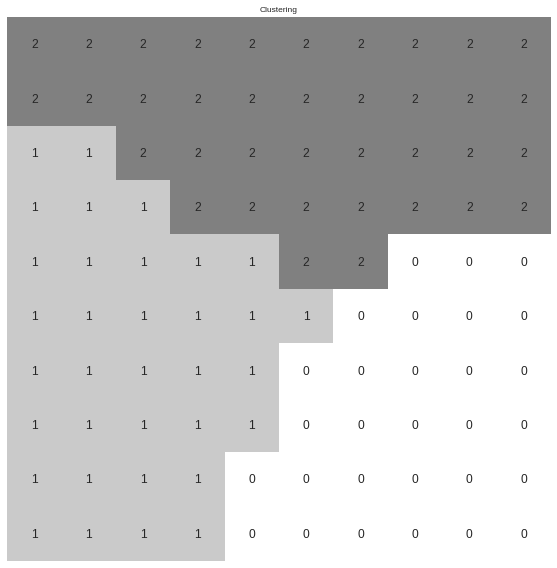

In [397]:
# K-Means Clustering
from sompy.visualization.hitmap import HitMapView
sm.cluster(3)
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)